# First data examples

This notebook goes through some real data examples

In [9]:
import numpy as np
import pandas as pd

## Google Analytics data

This is a simple dataset about users at a website.

In [11]:
# ?pd.read_excel, why am I writing this again? it just gives a massive error. TODO

In [12]:
webdata = pd.read_excel("../Notebooks and data1/Webanalytics_data_example.xlsx", sheet_name = "Dataset1")

In [13]:
webdata

,MediaChannel,Sessions,PercentNewSessions,NewUsers,BounceRate,PagesPerSession,AvgSessionDuration,Transactions,Revenue
0,Organic_Search,76852,0.784092,60259,0.394837,7.225290,161.326342,989,94966.75
1,Social,59398,0.943315,56031,0.542375,3.232348,111.798832,38,1692.29
2,Paid_Search,31882,0.666395,21246,0.621918,4.461326,97.984129,425,21515.42
3,Direct,26348,0.758653,19989,0.459466,6.277820,162.812206,367,52054.79
4,Referral,18762,0.530540,9954,0.269961,12.226149,259.000320,1231,202558.88
5,Display,6411,0.850257,5451,0.834191,2.359850,34.354703,34,7956.42
6,Other,29,0.310345,9,0.586207,2.448276,57.344828,0,0.00
7,Email,19,0.210526,4,0.315789,3.368421,132.894737,0,0.00


In [14]:
webdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MediaChannel        8 non-null      object 
 1   Sessions            8 non-null      int64  
 2   PercentNewSessions  8 non-null      float64
 3   NewUsers            8 non-null      int64  
 4   BounceRate          8 non-null      float64
 5   PagesPerSession     8 non-null      float64
 6   AvgSessionDuration  8 non-null      float64
 7   Transactions        8 non-null      int64  
 8   Revenue             8 non-null      float64
dtypes: float64(5), int64(3), object(1)
memory usage: 708.0+ bytes


Selecting only those media channels for which bounce rate i larger than 0.6:

In [16]:
webdata[webdata["BounceRate"] > 0.6]

,MediaChannel,Sessions,PercentNewSessions,NewUsers,BounceRate,PagesPerSession,AvgSessionDuration,Transactions,Revenue
2,Paid_Search,31882,0.666395,21246,0.621918,4.461326,97.984129,425,21515.42
5,Display,6411,0.850257,5451,0.834191,2.359850,34.354703,34,7956.42


In [17]:
webdata[webdata["BounceRate"] > 0.6][["MediaChannel", "BounceRate"]]

,MediaChannel,BounceRate
2,Paid_Search,0.621918
5,Display,0.834191


Selecting the rows for which Transactions i bigger than 100 and Sessions is less than 30000

In [19]:
webdata[(webdata["Transactions"] > 100) & (webdata["Sessions"] < 30000 )]

,MediaChannel,Sessions,PercentNewSessions,NewUsers,BounceRate,PagesPerSession,AvgSessionDuration,Transactions,Revenue
3,Direct,26348,0.758653,19989,0.459466,6.277820,162.812206,367,52054.79
4,Referral,18762,0.530540,9954,0.269961,12.226149,259.000320,1231,202558.88


Finding the media channel with the highest revenue and putting the row on top (sorting the rows by revenue)

In [21]:
webdata.sort_values("Revenue",  ascending=False)[["MediaChannel", "Revenue"]]

,MediaChannel,Revenue
4,Referral,202558.88
0,Organic_Search,94966.75
3,Direct,52054.79
2,Paid_Search,21515.42
5,Display,7956.42
1,Social,1692.29
6,Other,0.00
7,Email,0.00


We can create a more precise measure for the effectiveness of a media channel by calculating the percentage of sessions that ended in a transaction. That is, for how many of the user sessions that the website had, did the user end up actually buying something. This is often referred to as the *conversion rate*. We create a new column called `ConversionRate` that is equal to `Transactions/Sessions`.

In [23]:
webdata["ConversionRate"] = webdata["Transactions"] / webdata["Sessions"]
webdata

,MediaChannel,Sessions,PercentNewSessions,NewUsers,BounceRate,PagesPerSession,AvgSessionDuration,Transactions,Revenue,ConversionRate
0,Organic_Search,76852,0.784092,60259,0.394837,7.225290,161.326342,989,94966.75,0.012869
1,Social,59398,0.943315,56031,0.542375,3.232348,111.798832,38,1692.29,0.000640
2,Paid_Search,31882,0.666395,21246,0.621918,4.461326,97.984129,425,21515.42,0.013330
3,Direct,26348,0.758653,19989,0.459466,6.277820,162.812206,367,52054.79,0.013929
4,Referral,18762,0.530540,9954,0.269961,12.226149,259.000320,1231,202558.88,0.065611
5,Display,6411,0.850257,5451,0.834191,2.359850,34.354703,34,7956.42,0.005303
6,Other,29,0.310345,9,0.586207,2.448276,57.344828,0,0.00,0.000000
7,Email,19,0.210526,4,0.315789,3.368421,132.894737,0,0.00,0.000000


In [24]:
webdata.sort_values("ConversionRate",  ascending=False)[["MediaChannel", "ConversionRate"]]

,MediaChannel,ConversionRate
4,Referral,0.065611
3,Direct,0.013929
2,Paid_Search,0.013330
0,Organic_Search,0.012869
5,Display,0.005303
1,Social,0.000640
6,Other,0.000000
7,Email,0.000000


## Diabetes dataset

This is classic dataset in machine learning and one of the example dataset that comes with scikit-learn. Thus we can load it directly from the scikit-learn package.

In [26]:
from sklearn.datasets import load_diabetes

In [27]:
d_data = load_diabetes(as_frame=True)
d_data

{'data':           age       sex       bmi        bp        s1        s2        s3  \
 0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 ..        ...       ...       ...       ...       ...       ...       ...   
 437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
 439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
 441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   
 
            s4        s5        s6  
 0   -0.002592  0

In [28]:
diabetes_data = d_data.data

In [29]:
diabetes_data["Target"] = d_data.target

In [30]:
diabetes_data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [31]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  Target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [32]:
diabetes_data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


We see that the means are almost close to zero, which means the data is probably normalized (more on this later in the course)

We want to know what correlates with the target...

In [35]:
diabetes_data["Target"].corr(diabetes_data["age"])

0.18788875071891983

In [36]:
diabetes_data["Target"].corr(diabetes_data["sex"])

0.04306199845160532

In [37]:
diabetes_data["Target"].corr(diabetes_data["bmi"])

0.5864501344746884

In [38]:
diabetes_data["Target"].corr(diabetes_data["bp"])

0.44148175856257094

In [39]:
diabetes_data["Target"].corr(diabetes_data["s1"])

0.2120224810145506

In [40]:
diabetes_data["Target"].corr(diabetes_data["s2"])

0.17405358696874254

In [41]:
diabetes_data["Target"].corr(diabetes_data["s3"])

-0.3947892506709185

In [42]:
diabetes_data["Target"].corr(diabetes_data["s4"])

0.4304528847447727

In [43]:
diabetes_data["Target"].corr(diabetes_data["s5"])

0.5658825924427437

In [44]:
diabetes_data["Target"].corr(diabetes_data["s6"])

0.38248348424858114

Or we can actually get all the correlations in a matrix with one line of code

In [46]:
diabetes_data.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


Later, when we talk about regression we will try to predict the target from all the columns.

## Adult dataset from UCI Machine Learning Repository

Contains information about income from adults in the US. We will load data from UCI Machine Learning Repository. See: https://archive.ics.uci.edu/dataset/2/adult

In [49]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [50]:
#pip install ucimlrepo

In [51]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [53]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [54]:
y

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.


**EXERCISE:** Answer the following questions based on the Adult dataset
1. What is the mean age of all persons in the data?
1. What is the mean age of female persons? What about male persons?
1. How many different types of educations are there?
2. What are the different types of education and how many persons are the for each type?
3. Is there a difference in educational level across sex?
4. What is the most common relationship status?
5. Is there a correlation between hours per week (worked) and age?
6. Is the average hours per week (worked) different across different marital-status groups?
7. Is there an income difference across sexes?

# 1. What is the mean age of all persons in the data?

In [57]:
X["age"].mean()

38.64358543876172

In [58]:
X["age"].min()

17

In [59]:
X["age"].max()

90

In [60]:
X["age"].sum()

1887430

In [61]:
1887430/48842 # amount of rows divided by sum

38.64358543876172

In [62]:
X["age"].sum()/len(X)

38.64358543876172

# 2. What is the mean age of female persons? What about male persons?

In [64]:
X[X["sex"] == "Male"]["age"].mean()  
# we get a table on the condition that the column of sex is equal to Male, 
# then fetch only the age column and then calculate the mean

39.49439509954058

In [65]:
X[X["sex"] == "Female"]["age"].mean()

36.92798913043478

# 3. How many different types of educations are there?

In [67]:
len(X["education-num"].unique())

16

In [68]:
X["education-num"].max()

16

# 4. What are the different types of education and how many persons are the for each type?

In [70]:
X["education"].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [71]:
X["education"].value_counts() # there exist something called group by, look at it

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [72]:
len(X[X["education"] == "Bachelors"]) # how do you do this for each one auotmatically by code

8025

In [73]:
X[X["education"] == "Some-college"].shape # "10878" bit easy to say shape to get the length

(10878, 14)

In [74]:
X["education"].sort_values()

24420            10th
39506            10th
4288             10th
39502            10th
18671            10th
             ...     
41477    Some-college
30570    Some-college
23440    Some-college
5880     Some-college
10802    Some-college
Name: education, Length: 48842, dtype: object

# 5. Is there a difference in educational level across sex?

In [76]:
X[["education-num", "sex"]].groupby("sex").mean() # can you do this another way?!?

,education-num
sex,
Female,10.044034
Male,10.094977


In [77]:
X[X["sex"] == "Female"]["education-num"].mean() # i would find the mean of education-num for each sex then compare them

10.044034090909092

In [78]:
X[X["sex"] == "Male"]["education-num"].mean() 

10.094977029096478

# 6. What is the most common relationship status?

In [80]:
X["relationship"].value_counts()

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64

In [81]:
X["relationship"].value_counts().shape

(6,)

# 7. Is there a correlation between hours per week (worked) and age?

In [83]:
X["age"].corr(X["hours-per-week"]) # is this correct?

0.07155833852698287

In [84]:
X["hours-per-week"].corr(X["age"]) # they produc the same result regardless of direction, what is that called again?

0.07155833852698287

# 8. Is the average hours per week (worked) different across different marital-status groups?

In [86]:
X[["hours-per-week", "marital-status"]].groupby("marital-status").mean() 

,hours-per-week
marital-status,
Divorced,41.115483
Married-AF-spouse,39.810811
Married-civ-spouse,43.306984
Married-spouse-absent,39.684713
Never-married,36.891357
Separated,39.667974
Widowed,33.438076


# 9. Is there an income difference across sexes?

In [88]:
my_x = X.copy()

In [89]:
my_x["income"] = y.income

In [90]:
my_x[["income", "sex"]].groupby("sex").value_counts()

sex     income
Female  <=50K      9592
        <=50K.     4831
        >50K       1179
        >50K.       590
Male    <=50K     15128
        <=50K.     7604
        >50K       6662
        >50K.      3256
Name: count, dtype: int64

In [91]:
my_adult_data = my_x.replace({">50K.":">50K", "<=50K.":"<=50K"})

In [92]:
my_adult_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [93]:
my_adult_data["income"].unique()
my_adult_data["income"].nunique()

2

In [94]:
my_mosaic = my_adult_data[["income", "sex"]].groupby("sex").value_counts() # how would you calculate the procentage this by code?

In [95]:
pd.crosstab(my_adult_data['income'],my_adult_data['sex'])

sex,Female,Male
income,,
<=50K,14423,22732
>50K,1769,9918


In [96]:
14423/((14423+1769)/100) # 89% of females earn below 50k   

89.07485177865614

In [97]:
1769/((14423+1769)/100)  # 11% of females earn above 50k

10.925148221343875

In [98]:
22732/((22732+9918)/100) # 69% of males earn below 50k

69.62327718223584

In [99]:
9918/((22732+9918)/100) # 30% of males earn below 50k

30.376722817764165

In [100]:
from statsmodels.graphics.mosaicplot import mosaic

(<Figure size 640x480 with 3 Axes>,
 {('Female', '<=50K'): (0.0, 0.0, 0.329868612793695, 0.887789220385277),
  ('Female', '>50K'): (0.0,
   0.8911114795214895,
   0.329868612793695,
   0.10888852047851034),
  ('Male', '<=50K'): (0.3348437371718045,
   0.0,
   0.6651562628281956,
   0.6939197061352408),
  ('Male', '>50K'): (0.3348437371718045,
   0.6972419652714534,
   0.6651562628281956,
   0.3027580347285465)})

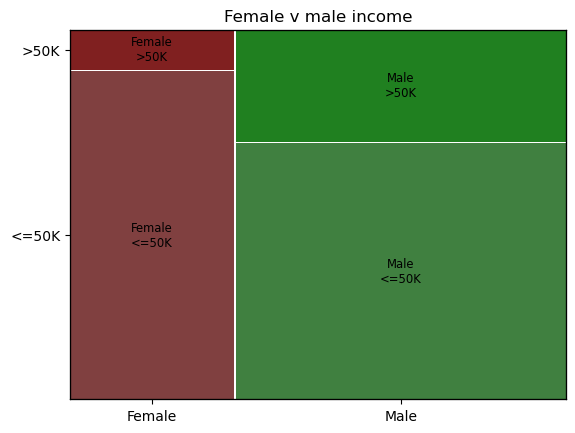

In [101]:
mosaic(my_mosaic, title='Female v male income')